<a href="https://colab.research.google.com/github/magaramol/Customer-Churn-Prediction-using-ANN/blob/main/ANN_implemetation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# !pip install tensorflow

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.18.0


In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [5]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [6]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


In [11]:
# df

In [12]:
# Initialising the ANN
classifier = Sequential()

In [13]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=11,activation='relu'))

In [14]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [15]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=1,activation='relu'))

In [16]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7666 - loss: 1.2185 - val_accuracy: 0.7819 - val_loss: 0.5707
Epoch 2/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7889 - loss: 0.5231 - val_accuracy: 0.8054 - val_loss: 0.5198
Epoch 3/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8090 - loss: 0.5073 - val_accuracy: 0.8080 - val_loss: 0.5066
Epoch 4/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8073 - loss: 0.4865 - val_accuracy: 0.8095 - val_loss: 0.4887
Epoch 5/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8218 - loss: 0.4610 - val_accuracy: 0.8118 - val_loss: 0.4871
Epoch 6/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8145 - loss: 0.4452 - val_accuracy: 0.8156 - val_loss: 0.4870
Epoch 7/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8176 - loss: 0.4614 - val_accuracy: 0.8073 - val_loss: 0.4685
Epoch 8/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8143 - loss: 0.4488 - val_accuracy: 0.

In [18]:
# list all data in history

print(model_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


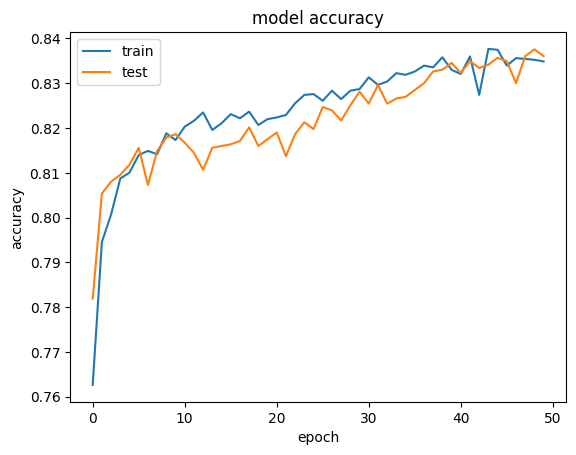

In [19]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

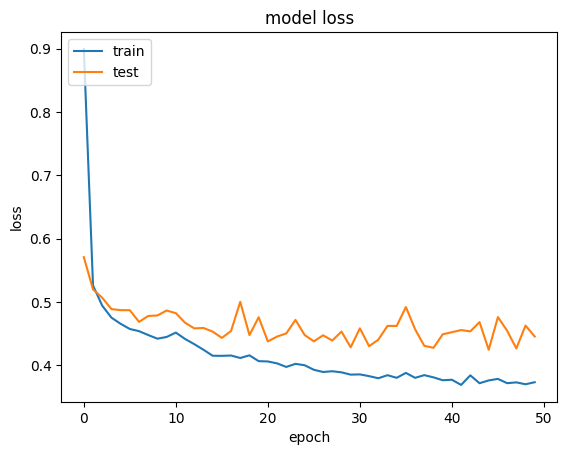

In [20]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [22]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1526,   69],
       [ 258,  147]])

In [23]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [24]:
score

0.8365

In [26]:
classifier.get_weights()

[array([[-0.09083094,  0.21535152, -0.15707797, -0.18115231, -0.01878514,
          0.05652049,  0.10279011,  0.0813562 , -0.07876534,  0.00402245,
          0.01146636],
        [ 0.6040463 , -0.20935798, -0.31686914,  0.23168607,  0.20226562,
          0.49022168, -0.40419605, -0.14201093, -0.5940762 ,  0.6036267 ,
         -0.12635954],
        [-0.04495434,  0.3241816 , -0.13674128, -0.10363767, -0.2152096 ,
          0.32639608,  0.30518815,  0.35824943, -0.06473722,  0.14672863,
         -0.47030705],
        [ 0.1897078 ,  0.2783677 ,  0.11526123, -0.15892251, -0.36599416,
         -0.19881071, -0.38053647, -0.6598327 ,  0.51031524, -0.1675764 ,
         -0.61734384],
        [-0.15792187,  0.31215245, -0.27075106, -0.3166895 ,  0.95267427,
         -0.6923369 , -0.1727274 , -0.32408935,  0.50232387,  0.14946614,
         -0.23465848],
        [-0.04392643, -0.17582695,  0.08519606, -0.16957717,  0.10177834,
         -0.254604  , -0.38971034,  0.09228826, -0.14970775,  0.0408548